# MNIST a.k.a 'Hello World!'

## 1. Load the data

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

## 2. Look at the data

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_valid.shape

(10000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_valid.shape

(10000,)

In [6]:
x_train.dtype

dtype('uint8')

In [7]:
(x_train.min(), x_train.max())

(0, 255)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

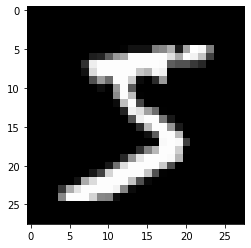

In [9]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

In [10]:
y_train[0]

5

## 3. Pre-process the data

This involves:
- flattening the images (turning them from 2D to 1D)
- normalizing the images (make all values be between 0 and 1)
- categorizing the labels (one-hot encode the y's)

### 3a. Flattening

In [11]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [12]:
x_train.shape

(60000, 784)

In [13]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### 3b. Normalizing

In [14]:
x_train = x_train / 255
x_valid = x_valid / 255 

In [15]:
x_train.dtype

dtype('float64')

In [16]:
(x_train.min(), x_train.max())

(0.0, 1.0)

### 3c. One-hot encoding labels

In [17]:
import tensorflow.keras as keras

num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [18]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 4. Create the model

In [19]:
from tensorflow.keras.models import Sequential

model = Sequential()

2022-06-26 10:20:02.349002: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Input layer

In [20]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=512, activation='relu', input_shape=(784,)))

Hidden layer

In [21]:
model.add(Dense(units=512, activation='relu'))

Output layer

In [22]:
model.add(Dense(units=10, activation='softmax'))

Look at model

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Compile model

In [24]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## 5. Train/fit the model

In [25]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5


2022-06-26 10:20:02.570480: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


1875/1875 [==============================] - 10s 5ms/step - loss: 0.3107 - accuracy: 0.9023 - val_loss: 0.1458 - val_accuracy: 0.9616
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1015 - accuracy: 0.9730 - val_loss: 0.1120 - val_accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0788 - accuracy: 0.9798 - val_loss: 0.1238 - val_accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0638 - accuracy: 0.9846 - val_loss: 0.1189 - val_accuracy: 0.9751
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0603 - accuracy: 0.9867 - val_loss: 0.1797 - val_accuracy: 0.9703


In [26]:
# list all data in history

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


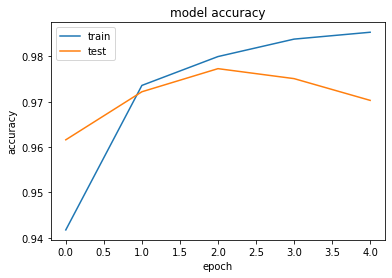

In [27]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

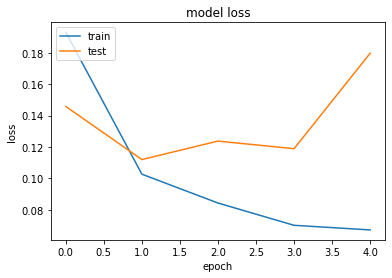

In [28]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Bonus

Try with more hidden nodes

In [29]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 937,482
Trainable params: 937,482
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3130 - accuracy: 0.9042 - val_loss: 0.1271 - val_accuracy: 0.9671
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1041 - accuracy: 0.9739 - val_loss: 0.1465 - val_accuracy: 0.9685
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0901 - accuracy: 0.9780 - val_loss: 0.1268 - val_accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0707 - accuracy: 0.9838 - val_loss: 0.1430 - val_accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0651 - accuracy: 0.9864 - val_loss: 0.1354 - val_accuracy: 0.9786


In [31]:
model = Sequential()
model.add(Dense(units=1024, activation='relu', input_shape=(784,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 65s 28ms/step - loss: 0.3086 - accuracy: 0.9047 - val_loss: 0.1020 - val_accuracy: 0.9713
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1089 - accuracy: 0.9723 - val_loss: 0.1141 - val_accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0896 - accuracy: 0.9792 - val_loss: 0.1845 - val_accuracy: 0.9701
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0717 - accuracy: 0.9833 - val_loss: 0.1673 - val_accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0655 - accuracy: 0.9854 - val_loss: 0.1356 - val_accuracy: 0.9812
